In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("data/HR_Employee_MissingValuesFilled.csv", skipinitialspace=True, sep=',')

In [ ]:
cat_df = df.select_dtypes(include='object')
for col in df.columns:
    if col in cat_df.columns.tolist():
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        print(le.classes_)
    else:
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])

df.describe()

In [16]:
df.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,cluster
0,-0.519337,-0.023755,1.087899,0.447623,-0.074642,2.525591,0.489376,1.121144,0.179890,0.764998,-0.058285,4
1,1.030102,-1.010909,-0.683535,-0.380793,-0.857314,-0.678049,-0.330589,1.249709,-1.011089,1.041095,-0.368715,3
2,-0.675520,0.840004,-1.470840,-0.395930,0.255348,-0.678049,2.675949,-0.550208,-1.011089,0.212802,-0.368715,1
3,0.373140,-0.517332,-0.043851,-0.847522,0.472344,-0.277594,-0.330589,0.092620,-0.670810,0.764998,-0.679146,2
4,1.431717,-0.023755,0.448214,0.340286,-1.123499,-0.678049,-0.877232,-1.193036,0.520170,-0.615492,-0.058285,2


In [4]:
print(df.info())

to_discard = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnviromentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'TrainingTimesLastYear', 'Over18', 'StandardHours', 'YearsWithCurrManager', 'Age']

to_df = [col for col in df.columns if col not in to_discard]

df = df[to_df]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   float64
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   int32  
 14  JobSatis

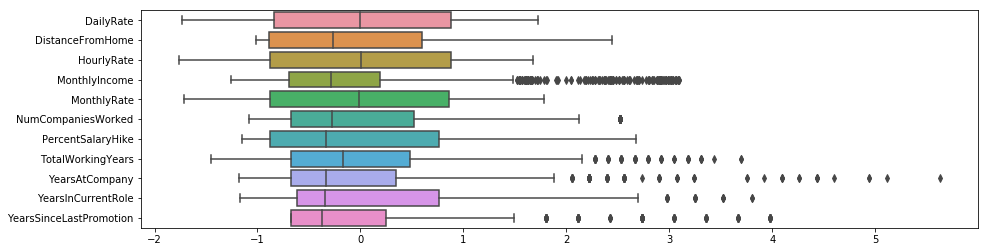

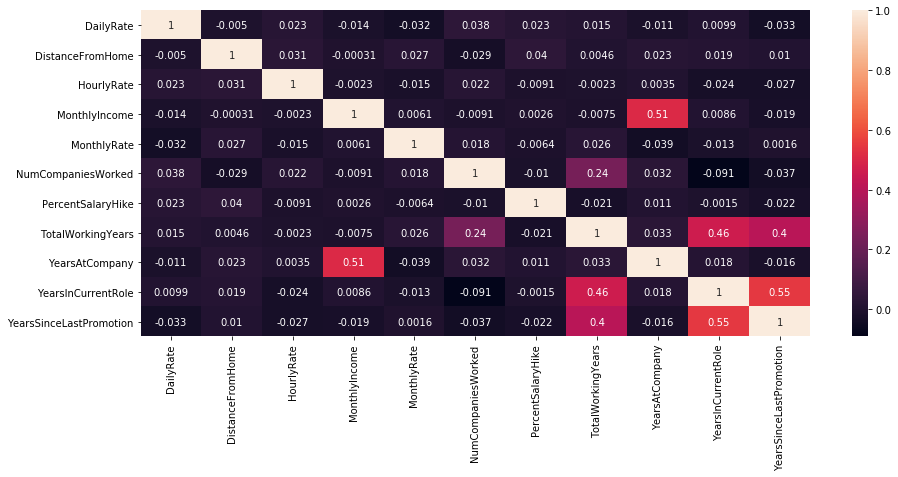

In [5]:
plt.figure(figsize = (15,4))
sb.boxplot(data = df, orient = "h")
plt.show()

plt.figure(figsize = (15,6))
sb.heatmap( df.corr(), annot=True)

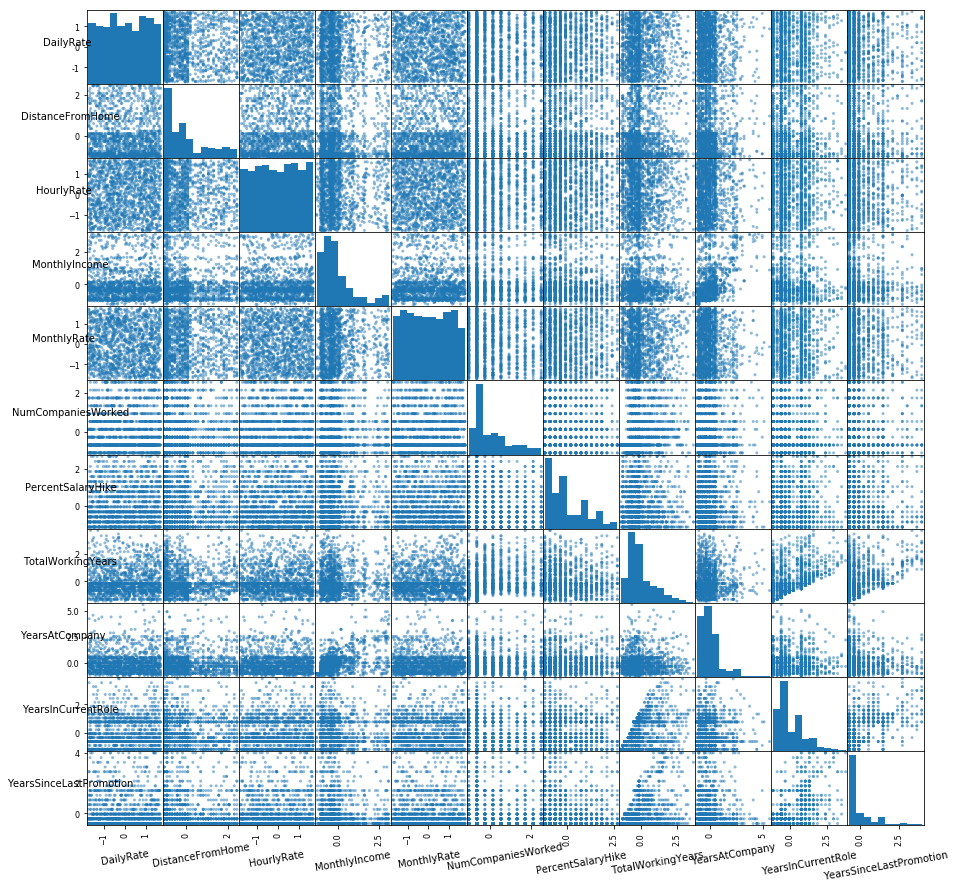

In [6]:
scatter_matrix = scatter_matrix(df, figsize=(15, 15))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 10)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

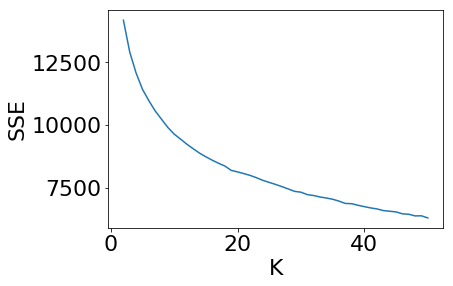

In [7]:
sse_list = list()
silouette_scores = {}
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df)

    sse = kmeans.inertia_
    sse_list.append(sse)

    labels_k = kmeans.labels_
    silouette = metrics.silhouette_score(df, labels_k)
    silouette_scores[k] = silouette

plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

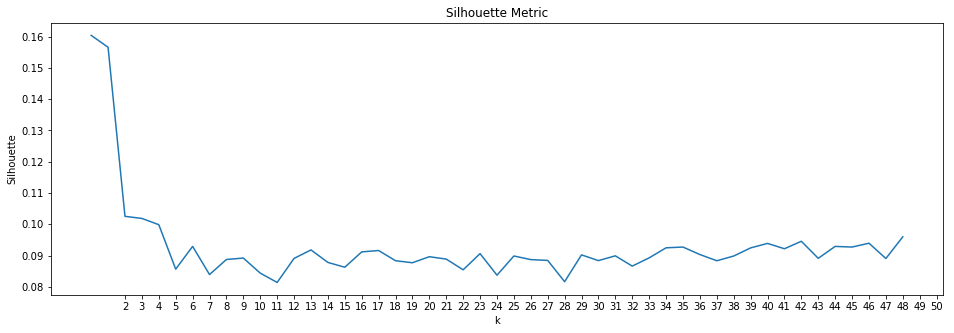

In [8]:
plt.figure(figsize = (16,5))
plt.plot(silouette_scores.values())
plt.xticks(range(2, len(sse_list) + 2), silouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

In [9]:
kl = KneeLocator(
    range(2, len(sse_list) + 2), sse_list, curve="convex", direction="decreasing"
)
print("Number of cluster: ", kl.elbow)

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100)
kmeans.fit(df)

Number of cluster:  19


KMeans(max_iter=100, n_clusters=5)

In [10]:
final_sse = kmeans.inertia_
print("Final SSE: ", final_sse)

Final SSE:  11421.704974354838


In [11]:
labels_k = kmeans.labels_
final_silouette = metrics.silhouette_score(df, labels_k)
print("Final silouette: ", final_silouette)
print("First 5 labels: ", kmeans.labels_[:5])
print("Dimensions of clusters: ", np.unique(kmeans.labels_, return_counts=True))

Final silouette:  0.10244845013211915
First 5 labels:  [4 3 1 2 2]
Dimensions of clusters:  (array([0, 1, 2, 3, 4]), array([156, 242, 500, 298, 274], dtype=int64))


In [12]:
hist, bins = np.histogram(kmeans.labels_,
                          bins=range(0, len(set(kmeans.labels_)) + 1))
print(dict(zip(bins, hist)))

print(kmeans.cluster_centers_)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

{0: 156, 1: 242, 2: 500, 3: 298, 4: 274}
[[ 2.16957769e-02  5.77163444e-02 -2.20862843e-02  2.07827469e+00
  -7.85507889e-02 -3.37274932e-02 -5.90194607e-02 -1.78148362e-02
   1.76748781e+00  7.49841858e-03 -2.39369289e-01]
 [-1.81788147e-02  1.64665568e+00  5.94423127e-02 -2.54673761e-01
   1.44294875e-01 -2.16367750e-01  1.35864860e-01 -1.65573926e-01
  -2.76918067e-01 -1.48863412e-01 -2.40438264e-01]
 [-8.50126654e-02 -4.64519684e-01  1.35240930e-02 -2.60977619e-01
  -8.88380899e-02 -5.53908329e-01 -4.63345317e-02 -5.90320432e-01
  -2.18763883e-01 -4.22775287e-01 -4.33905671e-01]
 [-4.17931950e-02 -2.15886104e-01 -1.31365650e-01 -2.12335550e-01
  -1.22657979e-03 -1.43213460e-01 -5.26814646e-02  9.38649864e-01
  -1.28907970e-01  1.28661871e+00  1.43240604e+00]
 [ 2.04289915e-01 -4.04746438e-01  7.82676566e-02 -2.51149629e-01
   8.07267483e-02  1.37684036e+00  5.54528544e-02  2.12739274e-01
  -2.22326313e-01 -5.00618756e-01 -4.17432466e-01]]


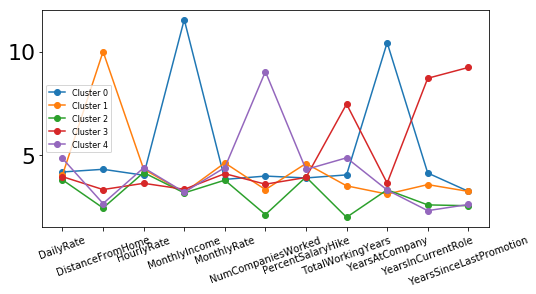

In [13]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=10, rotation=20)
plt.legend(fontsize=8)
plt.show()

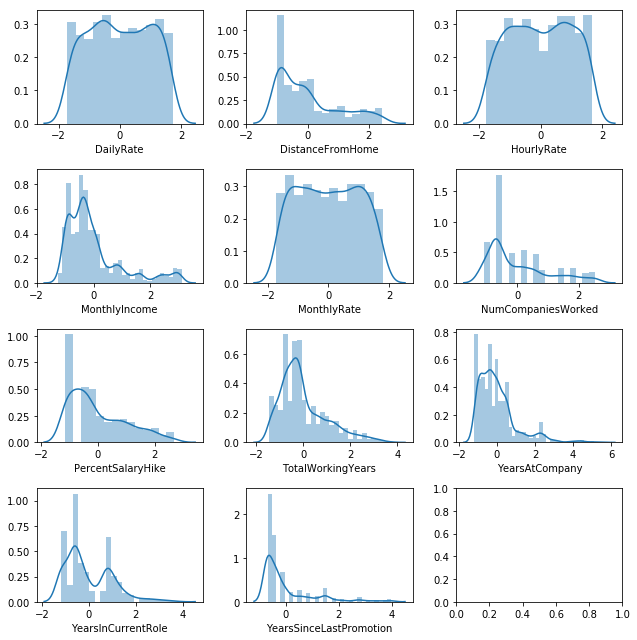

In [14]:
fig,ax = plt.subplots(4,3, figsize=(9,9))
sb.distplot(df['DailyRate'], ax = ax[0,0])
sb.distplot(df['DistanceFromHome'], ax = ax[0,1])
sb.distplot(df['HourlyRate'], ax = ax[0,2])
sb.distplot(df['MonthlyIncome'], ax = ax[1,0])
sb.distplot(df['MonthlyRate'], ax = ax[1,1])
sb.distplot(df['NumCompaniesWorked'], ax = ax[1,2])
sb.distplot(df['PercentSalaryHike'], ax = ax[2,0])
sb.distplot(df['TotalWorkingYears'], ax = ax[2,1])
sb.distplot(df['YearsAtCompany'], ax = ax[2,2])
sb.distplot(df['YearsInCurrentRole'], ax = ax[3,0])
sb.distplot(df['YearsSinceLastPromotion'], ax = ax[3,1])
plt.tight_layout()
plt.show()

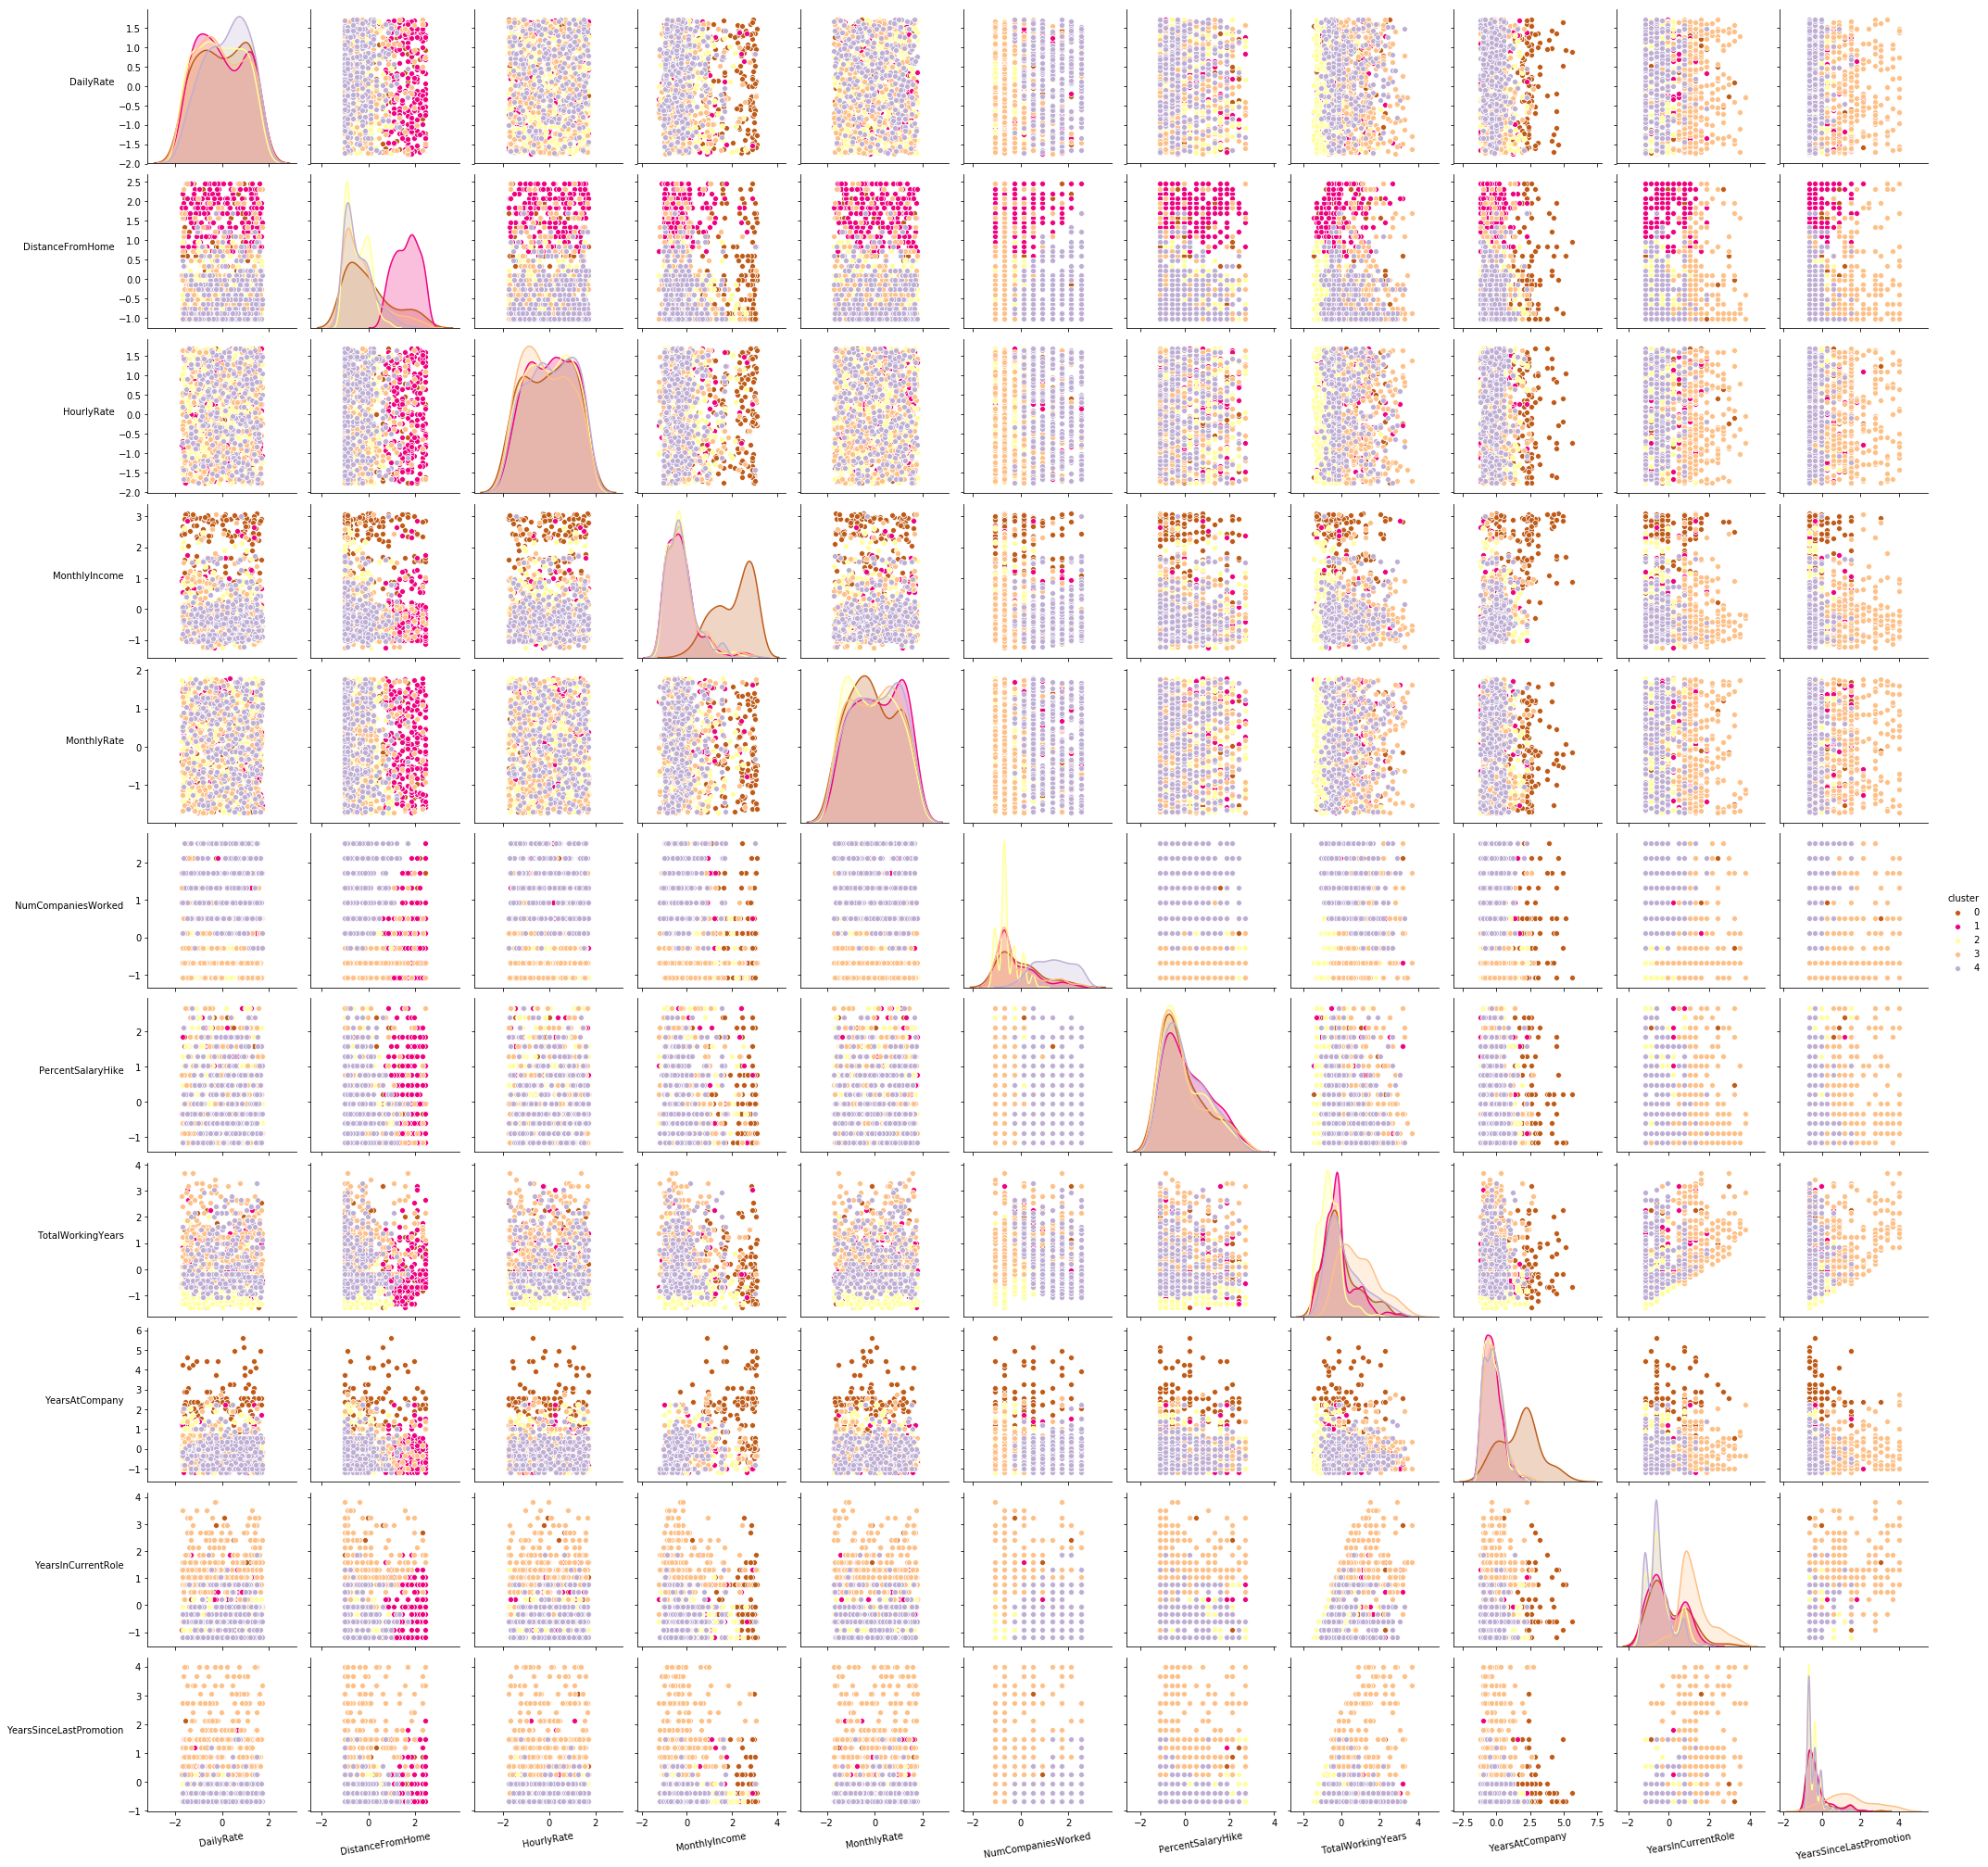

In [15]:
df["cluster"] = kmeans.labels_
g=sb.pairplot(data = df, hue = "cluster", palette = "Accent_r")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize= 10 , rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), fontsize= 10, rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()